In [43]:
# libraries for data manipulation and exploration
import pandas as pd
import numpy as np

# for text processing
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [44]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mihiragarwal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/mihiragarwal/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [45]:
file_path = 'data.csv'
data = pd.read_csv(file_path)
data.head()

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1


### **<font color='#7868e6'>Data description</font>**
This dataset contains 4009 rows and 4 columns, here we will see the what each column describe.
- `URLs` : URL of the news
- `Headline` : Headline of the news
- `Body` : News description
- `Label` : **0** for fake news and **1** for true news

### **<font color='#7868e6'>Analysis</font>**

In [46]:
# dropping rows where there is any null value
data.dropna(inplace=True, axis=0)

# taking only the name of website from the URLs
pattern = 'https?://([\w.]+)/'
data['Website'] = data.URLs.str.extract(pattern)
data.drop('URLs', axis=1, inplace=True)

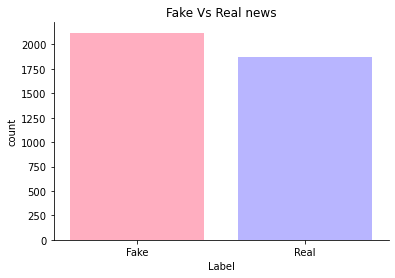

In [47]:
# making a bar plot to count the frequency of 
# fake and real news
sns.countplot(x='Label', 
              data=data,
              palette=['#ffaec0', '#b8b5ff'],
              saturation=1)
sns.despine()
plt.xticks([0,1], ['Fake', 'Real'])
plt.title('Fake Vs Real news');

In [48]:
fake_news_count = data[data.Label == 0]['Website'].value_counts()
real_news_count = data[data.Label == 1]['Website'].value_counts()

In [49]:
fdf = pd.DataFrame({
    'Web':fake_news_count.index,
    'Fake':fake_news_count.values
})

rdf = pd.DataFrame({
    'Web':real_news_count.index,
    'Real':real_news_count.values
})

In [50]:
rf_count = pd.merge(rdf, fdf, on='Web', how='outer').fillna(0)
rf_count['Real'] = rf_count['Real'].astype(int)
rf_count['Fake'] = rf_count['Fake'].astype(int)
rf_count

,Web,Real,Fake
0,www.reuters.com,646,0
1,www.cnn.com,389,0
2,www.nytimes.com,341,0
3,www.bbc.com,333,0
4,abcnews.go.com,57,0
5,money.cnn.com,49,0
6,edition.cnn.com,15,0
7,inhealth.cnn.com,14,0
8,www.bbc.co.uk,10,0
9,bleacherreport.com,8,0


Now, we observed that websites are only posting either fake news or real news but not both of them means one website is only posting one type of news either fake or real but not both. 

Most of the websites are posting real news, only four websites are there posting fake news.

So, we want to see the following:
- Top 5 websites posting real news
- Top 5 websites posting fake news

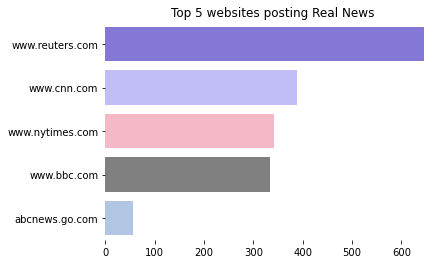

In [51]:
sns.barplot(y=real_news_count[:5].index, x=real_news_count[:5].values, 
            palette=['#7868e6', '#b8b5ff', '#ffaec0', 'grey', '#a7c5eb'])
sns.despine(bottom=True, left=True)
plt.title('Top 5 websites posting Real News');

### **<font color='#7868e6'>Text cleaning</font>**
Here, we will remove the unwanted words such as puntuation marks and stop words like - the, is, there, his etc. beacause these words are more frequent and don't have much importance. So, by removing these words we will get important words which will help us to find patterns regarding fake and real news.

 **Steps for text cleaning :**
- convert each word to lower case
- remove any words apart from alphabets
- remove stop words


In [52]:
lm = WordNetLemmatizer()
def clean_text(column):
    corpus = []
    for value in column:
        # convert each word into lower case
        value = value.lower()
        # take only alphabets
        value = re.sub('[^a-z]', ' ', value)
        value = value.split()
        # lemmatizing those words which are not stop words
        value = [lm.lemmatize(word) for word in value\
                 if word not in set(stopwords.words('english'))]
        corpus.append(' '.join(value))
    return corpus    

# taking both headline and body of news into a single column
data['Text'] = data['Headline'] + ' ' + data['Body']
data['Text'] = clean_text(data.Text)

After cleaning we will try to know about the most frequent words come in real and fake news. To get this thing done, we can use a cloud of words which shows words frequency on the basis of their size means words with bigger fontsize appear mostly as compare to other.

We have combined both **Headline** and **Body** column.

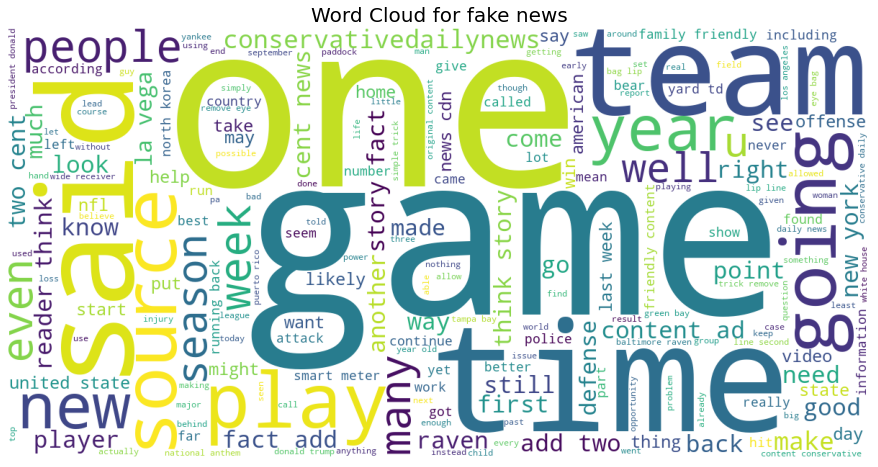

In [53]:
from wordcloud import WordCloud, STOPWORDS
sw = set(STOPWORDS)

fake_news = data[data.Label == 0]
real_news = data[data.Label == 1]

# wordcloud for fake news
fake_wc = WordCloud(width = 1200, height = 600, 
                    background_color ='white', 
                    stopwords = sw, 
                    min_font_size = 10).generate(' '.join(fake_news.Text)) 
  


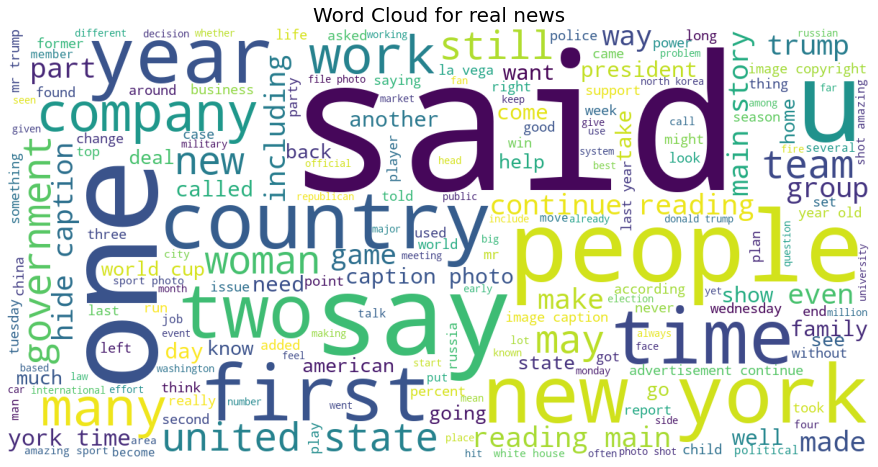

In [54]:
# wordcloud for real news
real_wc = WordCloud(width = 1200, height = 600, 
                    background_color ='white', 
                    stopwords = sw, 
                    min_font_size = 10).generate(' '.join(real_news.Text)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (12, 6), facecolor = None) 
plt.imshow(real_wc) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('Word Cloud for real news', fontsize=20);

### **<font color='#7868e6'>Modeling</font>**
Here, we are going to build a deep learning model.

In [55]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM, Dense

In [56]:
# one hot representation of words
oh_repr = [one_hot(words, 5000) for words in data.Text]

In [57]:
# list to store length of words in each news
len_list = []
for w in data.Text:
    w = w.split()
    len_list.append(len(w))

print('Summary of word length :')
pd.Series(len_list).describe()

Summary of word length :


count    3988.000000
mean      289.271063
std       289.423529
min        10.000000
25%        65.000000
50%       217.000000
75%       419.000000
max      3171.000000
dtype: float64

In [58]:
# taking sentences length as 400
sent_length = 400
# padding
embedded_doc = pad_sequences(oh_repr, padding='pre', maxlen=sent_length)
embedded_doc[:5]

array([[3090, 2129, 3323, ..., 3959,  594, 1911],
       [   0,    0,    0, ..., 2302,  832, 2193],
       [ 613, 2606, 2157, ..., 1622, 4389, 1697],
       [   0,    0,    0, ..., 2041, 4970, 3649],
       [   0,    0,    0, ..., 2399, 3593, 3724]], dtype=int32)

In [59]:
# initializing model
model = Sequential()
# adding embedding layer
model.add(Embedding(5000, 100, input_length=sent_length))
model.add(LSTM(150))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-08-06 02:16:03.713357: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-06 02:16:03.713503: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 400, 100)          500000    
                                                                 
 lstm (LSTM)                 (None, 150)               150600    
                                                                 
 dense (Dense)               (None, 1)                 151       
                                                                 
Total params: 650,751
Trainable params: 650,751
Non-trainable params: 0
_________________________________________________________________


In [60]:
from sklearn.model_selection import train_test_split
x = np.array(embedded_doc)
y = data.Label

# splitting the dataset into train and test
train_x, test_x, train_y, test_y = train_test_split(x, y, 
                                                    test_size=0.25, random_state=3)

In [61]:
history = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=10, batch_size=64)

Epoch 1/10


2022-08-06 02:16:04.688146: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-08-06 02:16:05.146466: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-08-06 02:16:05.574715: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-08-06 02:16:08.075661: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - ETA: 0s - loss: 0.6709 - accuracy: 0.6530

2022-08-06 02:16:26.646651: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-08-06 02:16:26.775665: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - 25s 394ms/step - loss: 0.6709 - accuracy: 0.6530 - val_loss: 0.6444 - val_accuracy: 0.7834
Epoch 2/10
47/47 [==============================] - 13s 263ms/step - loss: 0.5305 - accuracy: 0.8318 - val_loss: 0.3548 - val_accuracy: 0.8586
Epoch 3/10
47/47 [==============================] - 13s 273ms/step - loss: 0.2487 - accuracy: 0.9087 - val_loss: 0.2235 - val_accuracy: 0.9208
Epoch 4/10
47/47 [==============================] - 17s 366ms/step - loss: 0.1864 - accuracy: 0.9358 - val_loss: 0.2061 - val_accuracy: 0.9248
Epoch 5/10
47/47 [==============================] - 14s 284ms/step - loss: 0.1597 - accuracy: 0.9422 - val_loss: 0.1855 - val_accuracy: 0.9328
Epoch 6/10
47/47 [==============================] - 14s 289ms/step - loss: 0.2664 - accuracy: 0.9378 - val_loss: 0.3223 - val_accuracy: 0.8937
Epoch 7/10
47/47 [==============================] - 18s 370ms/step - loss: 0.5227 - accuracy: 0.7285 - val_loss: 0.5653 - val_accuracy: 0.6800
Epoch 8/10

In [66]:
from sklearn.metrics import confusion_matrix, accuracy_score
pred=(model.predict(test_x) > 0.5).astype("int32")



In [67]:
# accuracy of the model we built
accuracy_score(test_y, pred)

0.9368104312938816